In [5]:
%load_ext autoreload
%autoreload 2
import scqubits as sq
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import os
from utilities import *
import pandas as pd
import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
period = 3.02 # V
voltage_center = 1.455 # V

In [17]:
dataE01 = pd.read_csv('datafitE01.txt', delimiter=";",decimal=",", header=None)
dataE02 = pd.read_csv('datafitE02.txt', delimiter=";",decimal=",", header=None)
dataE01.columns = ['Voltage', 'Frequency']
dataE02.columns = ['Voltage', 'Frequency']

dataE01_array = dataE01.to_numpy()
dataE02_array = dataE02.to_numpy()

In [21]:
dataE01_array[:,0] = (dataE01_array[:,0] - voltage_center)/period
dataE02_array[:,0] = (dataE02_array[:,0] - voltage_center)/period

In [49]:
def minimizer(params):
    EJ,EC,EL = params
    fluxonium = sq.Fluxonium(EJ=EJ,EC=EC,EL=EL,flux=0,cutoff=40)
    
    val1 = fluxonium.get_spectrum_vs_paramvals(param_name='flux',param_vals=dataE01_array[:,0], evals_count=2, subtract_ground=True)
    cost_function1 = np.sum((val1.energy_table[:,1] - dataE01_array[:,1])**2)

    # val2 = fluxonium.get_spectrum_vs_paramvals(param_name='flux',param_vals=dataE02_array[:,0], evals_count=3, subtract_ground=True)
    # cost_function2= np.sum((val2.energy_table[:,2] - dataE02_array[:,1])**2)

    # cost_function = np.sqrt(cost_function1 + cost_function2)/np.sum(len(dataE01_array) + len(dataE02_array))
     cost_function=cost_function1
    return cost_function

In [ ]:
bounds_list = [
    (7,15),
    (1,4),
    (0.1,0.6)
]
result = differential_evolution(func=minimizer,bounds=bounds_list)

In [52]:
result

             message: Optimization terminated successfully.
             success: True
                 fun: 0.3837804072160934
                   x: [ 7.000e+00  4.000e+00  4.080e-01]
                 nit: 17
                nfev: 850
          population: [[ 7.010e+00  3.990e+00  4.031e-01]
                       [ 7.026e+00  3.950e+00  3.938e-01]
                       ...
                       [ 7.172e+00  3.989e+00  4.161e-01]
                       [ 7.341e+00  3.974e+00  3.953e-01]]
 population_energies: [ 3.838e-01  3.870e-01 ...  3.865e-01  3.884e-01]
                 jac: [ 9.572e-03 -3.481e-02 -7.216e-08]

In [ ]:
period = 3.02 # V
voltage_center = 1.455 # V

experimental_points = np.array([
    #level, flux, frequeny
    (1, 0, 6.8843),
    (2, 0, 6.8900),
    (2, 0.1092, 8.38),
    (1, 0.036, 6.3936),
    (2, (1.945-voltage_center)/period, 9.10),
    (2, (2.1509-voltage_center)/period, 10.01165),
    (3, (2.58-voltage_center)/period, 11.94),
    (4, (2.58-voltage_center)/period, 12),
    (2, (2.234-voltage_center)/period, 9.89),
    (2, (2.241-voltage_center)/period, 9.8616),
])

In [ ]:
bounds_list = [
    (7,15),
    (1,4),
    (0.1,0.6)
]
result = differential_evolution(func=minimizer,bounds=bounds_list)

In [40]:
result

             message: Optimization terminated successfully.
             success: True
                 fun: 0.3837804072160941
                   x: [ 7.000e+00  4.000e+00  4.080e-01]
                 nit: 14
                nfev: 723
          population: [[ 7.022e+00  3.994e+00  4.120e-01]
                       [ 7.133e+00  3.988e+00  4.041e-01]
                       ...
                       [ 7.076e+00  3.957e+00  4.066e-01]
                       [ 7.216e+00  3.908e+00  4.104e-01]]
 population_energies: [ 3.838e-01  3.855e-01 ...  3.860e-01  3.891e-01]
                 jac: [ 9.572e-03 -3.481e-02  1.610e-07]

In [ ]:
result

 message: Optimization terminated successfully.
 success: True
     fun: 0.020986414650897605
       x: [ 1.003e+01  1.811e+00  3.687e-01]
     nit: 23
    nfev: 1144
     jac: [ 1.223e-06  2.314e-06 -5.450e-06]

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

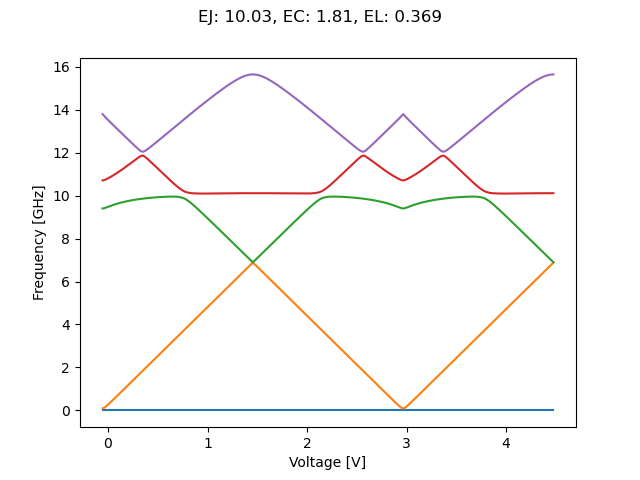

In [ ]:
EJ,EC,EL = result.x
fluxonium = sq.Fluxonium(EJ,EC,EL,flux=0, cutoff=40)

flux_array =np.linspace(-0.5,1,301)
evals = fluxonium.get_spectrum_vs_paramvals(param_name='flux',param_vals=flux_array,evals_count=5,subtract_ground=True)

plt.close('all')
%matplotlib widget
fig,ax = plt.subplots(1,1)
plt.suptitle(f"EJ: {np.round(EJ,2)}, EC: {np.round(EC,2)}, EL: {np.round(EL,3)}")
ax.plot(flux_array*period + voltage_center, evals.energy_table)
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Frequency [GHz]')
plt.show()